## Homework 1

This is due on Thurs, 6/1

**1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$**

  **a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$**

  **b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.**

  **c. Explain the difference.**
  
  *(The numpy method linspace will be useful for this)*

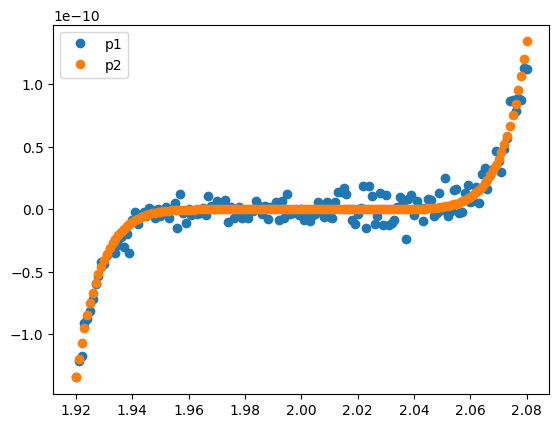

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def p1(x): 
    coeffs = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]
    return sum([c * x**i for (i, c) in enumerate(coeffs)])

def p2(x):
    return (x-2)**9

x = np.linspace(1.920, 2.080, int((2.080-1.920)/(0.001)) + 1)

plt.plot(x, [p1(i) for i in x], 'o', label='p1')
plt.plot(x, [p2(i) for i in x], 'o', label='p2')
plt.legend()

a. See graph above in blue

b. See graph above in orange

c. Having to add many terms of different magnitudes causes evaluating $p1(x)$ to give less precise outputs than $p2(x)$ due to floating-point errors.

***

**2\. How many different double-precision numbers are there?  Express your answer using powers of 2**


- There is a positive 0 and a negative 0, if we only count 0 once then we must subtract 1 from the count.
- There is a positive and negative infinity. If we don't count them then we must subtract 2 from the count.
- NaN's: represented by the first twelve bits being 0x7FF or 0xFFF and a nonzero mantissa
    - If we don't count them then we must subtract $2(2^{52}-1)$ from the count

$2^{64} - 2(2^{52}-1) - 3$

***

**3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?**

A main memory references takes 1000 times as much time than an L1 cache look-up.

A disk seek takes 2000 times as much time than a main memory reference.

***

**4\. From the Halide Video, what are 4 ways to traverse a 2d array?**

1. All at once, ahead of time
2. As needed, discarding after use
3. As needed, reusing old values
4. In blocks (e.g. 1x4) and parallelized

***

**5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.**

  a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

a.

Benefits: Easiest logic

Pitfalls: Poor locality (spends a lot of time loading to cache), uses much memory

b.

Benefits: Maximum locality, doesn't give data time to be evicted from cache before using it

Pitfalls: Redundant, reads same elements from input multiple times

c.

Benefits: Increases locality, deduces redundant work

Pitfalls: Serial dependence, relies on the fact that previous lines have been computed, so can't parallelize across scanlines

***

**6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.**

Let $B = U\Sigma V^T$.

Then $A = QBQ^T = Q(U\Sigma V^T)Q^T = (QU) \Sigma (QV)^T$.

So $A$ can be decomposed as $U' \Sigma V'^T$, where $U' = QU$ and $V' = QV$.

***

**7\. What is the *stochastic* part of *stochastic gradient descent*?**

During each iteration of SGD, a subset of the features are chosen stochastically for which to calculate the gradient.